In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### Gaussian Approximation

In [2]:
class index(object):
    def __init__(self, index_dec, value):
        self.dec = index_dec + 1
        self.bin = [int(i) for i in str(bin(index_dec))[2:].zfill(n)]
        self.value = value

In [3]:
def f_cal(x):
    a,b,c,d = 0.036,0.05,0.92,8
    if x >= 0 and x < a:
        return 0.00206*x - 0.36*x**2 + 18.68*x**3
    elif x >= a and x < b:
        return -0.001288 + 0.05*x
    elif x >= b and x < c:
        return 0.0159*x + 0.37*x**2 - 0.112*x**3
    elif x >= c and x < d:
        return 0.367*x + 0.075*x**2 - 0.0035*x**3 - 0.18
    elif x >= d:
        return -2.211 + 0.9848*x
    else:
        return 0

In [4]:
def g_cal(x):
    return 2*x

In [32]:
n = 9
N = 2**n

# R = 0.75
# ebn0 = 5
# SNR = ebn0 + 10*np.log10(2*R)
# sigma = (1/10**(SNR/10))**2

SNR = 7
sigma = (1/10**(SNR/10))**2

m = [[2/sigma**2]]
print(SNR, sigma, 2/sigma**2)

7 0.03981071705534974 1261.9146889603855


In [33]:
for i in range(n):
    tmp = []
    for j in m[-1]:
        tmp.append(f_cal(j))
        tmp.append(g_cal(j))
    m.append(tmp)

In [34]:
u_mean = []
for i in range(N):
    u_mean.append(index(i, m[-1][i]))

u_mean.sort(key = lambda x: x.value)
GaSeq = [i.dec for i in u_mean]
GaVal = [i.value for i in u_mean]

### Test F_Calculation

In [94]:
x = np.linspace(0, 10, 1000, endpoint=False)
y = []
for i in x:
    y.append(f_cal(i))

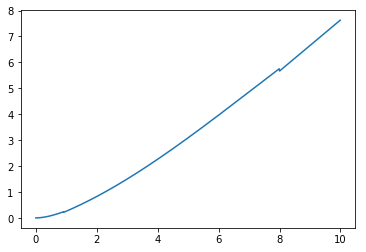

In [95]:
plt.plot(x,y)

### Read Hasse Chains

In [9]:
HasseChains = pd.read_csv('Hasse_Chains_' + str(N) + '.csv', index_col = None)

In [10]:
i = 1
chains = []
while 'chain'+str(i) in HasseChains:
    chains.append(list(HasseChains['chain'+str(i)]))
    i += 1
chains = [[int(j) for j in i if j == j] for i in chains]

### Revise

In [35]:
a = []
for i in GaSeq:
    for j in range(len(chains)):
        if i in chains[j]:
            a.append(j+1)

In [36]:
## chains range
a_inv = a[::-1]
rangemin = []
rangemax = []
for i in range(len(chains)):
    rangemin.append(a.index(i+1))
    rangemax.append(N-1-a_inv.index(i+1))

In [37]:
chains_backup = chains.copy()
GaSeq_revise = []
for i in a:
    GaSeq_revise.append(chains_backup[i-1][0])
    chains_backup[i-1] = chains_backup[i-1][1:]

### PW Guide Sequence

In [14]:
def GeneratePW(n):
    N = 2**n
    Nbin = [[int(i) for i in str(bin(i))[2:].zfill(n)] for i in range(N)]
    PW = []
    for i in range(N):
        tmp = 0
        for j in range(n):
            tmp += Nbin[i][n-j-1]*2**(j/4)
        PW.append([i+1,tmp])
    PW.sort(key = lambda x: x[1])
    PWindex = [i[0] for i in PW]
    return PWindex

In [15]:
def GeneratePWGuide(n):
    N = 2**n
    PW = GeneratePW(n)
    PWGuide = []
    for i in PW:
        if i <= N/2:
            PWGuide.append(0)
        else:
            PWGuide.append(1)
    return PWGuide

In [16]:
pwguide = GeneratePWGuide(n+1)

In [38]:
GaSeq1 = GaSeq_revise.copy()
GaSeq2 = [i+N for i in GaSeq]

In [39]:
GaSeq2N_revise = []
for i in pwguide:
    if i == 0:
        GaSeq2N_revise.append(GaSeq1[0])
        GaSeq1 = GaSeq1[1:]
    else:
        GaSeq2N_revise.append(GaSeq2[0])
        GaSeq2 = GaSeq2[1:]

In [40]:
GaSeq2N_revise

[1,
 2,
 3,
 5,
 9,
 17,
 33,
 65,
 129,
 257,
 4,
 6,
 7,
 10,
 11,
 18,
 8,
 19,
 34,
 13,
 35,
 14,
 66,
 21,
 67,
 12,
 130,
 69,
 25,
 131,
 37,
 258,
 133,
 20,
 259,
 132,
 38,
 261,
 137,
 265,
 513,
 68,
 273,
 36,
 289,
 321,
 385,
 73,
 41,
 49,
 15,
 70,
 22,
 23,
 81,
 26,
 16,
 74,
 29,
 39,
 134,
 42,
 27,
 135,
 50,
 45,
 71,
 24,
 514,
 145,
 97,
 28,
 75,
 46,
 515,
 138,
 82,
 40,
 146,
 43,
 260,
 161,
 517,
 98,
 76,
 139,
 51,
 30,
 262,
 193,
 141,
 85,
 263,
 136,
 52,
 521,
 266,
 162,
 149,
 31,
 267,
 147,
 77,
 274,
 264,
 194,
 165,
 529,
 275,
 163,
 99,
 290,
 269,
 197,
 101,
 545,
 291,
 268,
 72,
 322,
 293,
 142,
 323,
 277,
 577,
 150,
 641,
 386,
 325,
 276,
 387,
 324,
 389,
 329,
 769,
 393,
 292,
 401,
 417,
 449,
 83,
 153,
 516,
 44,
 78,
 54,
 169,
 53,
 518,
 57,
 47,
 140,
 519,
 89,
 79,
 32,
 166,
 58,
 522,
 48,
 105,
 61,
 90,
 523,
 195,
 84,
 86,
 87,
 148,
 530,
 100,
 113,
 59,
 198,
 102,
 56,
 143,
 55,
 525,
 531,
 297,
 546,
 164

In [41]:
np.savetxt('GAPW_HS_1024_SNR'+str(SNR)+'.txt', GaSeq2N_revise)